In [83]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Data/             lungcancer.ipynb


In [84]:
train_path = "./Data/train/"
val_path = "./Data/valid/"
test_path = "./Data/test/"

In [85]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        if  folder != ".DS_Store":
            num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;
    
train_set = GetDatasetSize(train_path)
val_set = GetDatasetSize(val_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n",val_set,"\n\n",test_set)

{'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 155, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 195, 'normal': 148, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 115} 

 {'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 15, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 23, 'normal': 13, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 21} 

 {'squamous.cell.carcinoma': 90, 'large.cell.carcinoma': 51, 'adenocarcinoma': 120, 'normal': 54}


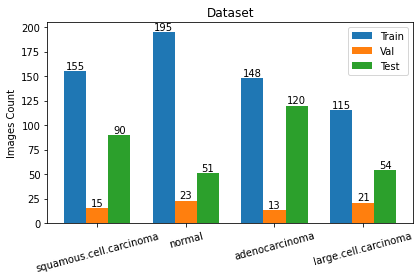

In [86]:
labels = ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']
train_list = list(train_set.values())
val_list = list(val_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)

fig.tight_layout()
plt.show()

In [87]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout

In [88]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

train_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [89]:
train_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [90]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(val_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')


Found 72 images belonging to 4 classes.


In [91]:
val_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [92]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [93]:
test_data.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [98]:
from tensorflow.keras.applications import MobileNetV2             

base_model = MobileNetV2(input_shape=(350, 350,3),
                      include_top=False, weights="imagenet", 
                      pooling='max')


In [109]:
from tensorflow.keras.applications import MobileNetV2             

base_model = MobileNetV2(input_shape=(350, 350,3),
                      include_top=False, weights="imagenet", 
                      pooling='max')
for layer in base_model.layers:
    layer.trainable = True
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(Dense(4, activation='sigmoid'))
model_resnet.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy'])
mc = ModelCheckpoint(
    filepath="./ct_resnet_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];
model_resnet.load_weights('./ct_resnet_best_model.hdf5')

In [99]:
for layer in base_model.layers:
    layer.trainable = True

In [100]:
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(Dense(4, activation='sigmoid'))

In [101]:
model_resnet.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy'])


In [102]:
mc = ModelCheckpoint(
    filepath="./ct_resnet_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [80]:
resnet = model_resnet.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 32, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/32
122/122 [==============================] - ETA: 0s - loss: 0.2625 - accuracy: 0.9013
Epoch 1: val_accuracy did not improve from 0.82857
122/122 [==============================] - 13s 106ms/step - loss: 0.2625 - accuracy: 0.9013 - val_loss: 1.0098 - val_accuracy: 0.7857
Epoch 2/32
122/122 [==============================] - ETA: 0s - loss: 0.3016 - accuracy: 0.8882
Epoch 2: val_accuracy did not improve from 0.82857
122/122 [==============================] - 13s 104ms/step - loss: 0.3016 - accuracy: 0.8882 - val_loss: 0.7956 - val_accuracy: 0.8000
Epoch 3/32
122/122 [==============================] - ETA: 0s - loss: 0.2878 - accuracy: 0.8898
Epoch 3: val_accuracy did not improve from 0.82857
122/122 [==============================] - 13s 104ms/step - loss: 0.2878 - accuracy: 0.8898 - val_loss: 0.9012 - val_accuracy: 0.7714
Epoch 4/32
122/122 [==============================] - ETA: 0s - loss: 0.3170 - accuracy: 0.8799
Epoch 4: val_accuracy did not improve from 0.82857
122/122 [=

Epoch 30/32
122/122 [==============================] - ETA: 0s - loss: 0.1390 - accuracy: 0.9507
Epoch 30: val_accuracy did not improve from 0.84286
122/122 [==============================] - 13s 104ms/step - loss: 0.1390 - accuracy: 0.9507 - val_loss: 0.9112 - val_accuracy: 0.7714
Epoch 31/32
122/122 [==============================] - ETA: 0s - loss: 0.1700 - accuracy: 0.9375
Epoch 31: val_accuracy did not improve from 0.84286
122/122 [==============================] - 13s 105ms/step - loss: 0.1700 - accuracy: 0.9375 - val_loss: 0.8424 - val_accuracy: 0.7714
Epoch 32/32
122/122 [==============================] - ETA: 0s - loss: 0.1768 - accuracy: 0.9375
Epoch 32: val_accuracy did not improve from 0.84286
122/122 [==============================] - 13s 105ms/step - loss: 0.1768 - accuracy: 0.9375 - val_loss: 0.8094 - val_accuracy: 0.8000


In [105]:
model_resnet.load_weights('./ct_resnet_best_model.hdf5')

In [108]:
resnet = model_resnet.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 32, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
)

Epoch 1/32


2022-07-16 00:12:57.037474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 44/122 [=========>....................] - ETA: 10s - loss: 0.1736 - accuracy: 0.9358

KeyboardInterrupt: 